# Proyecto Final Fundamentos de Aprendizaje Automático.

## 1- Introducción

### 1.a- Presentación del problema:

En este Jupyter Notebook, se aborda la resolución de un problema de clasificación de imágenes enfocado en la detección del virus COVID-19. El COVID-19 es un virus que ha mantenido al mundo en alerta durante un período prolongado debido a su alta capacidad de contagio y la gravedad de sus consecuencias. La detección de la presencia del virus en el organismo humano no ha sido una tarea sencilla, ya que los métodos tradicionales, como los test de antígenos, generan una gran cantidad de residuos y su fiabilidad no siempre es la más alta.

Una de las complicaciones más serias asociadas al COVID-19 es que algunas personas desarrollan neumonía como consecuencia de la infección. La detección temprana y precisa de esta neumonía es crucial para el tratamiento adecuado de los pacientes. En este contexto, el uso de imágenes de rayos X de tórax se ha convertido en una herramienta valiosa para el diagnóstico.

El objetivo de este proyecto es clasificar imágenes de rayos X de tórax para detectar la presencia de neumonía y, específicamente, determinar si es causada por COVID-19. Utilizaremos un conjunto de datos de código abierto compuesto por imágenes etiquetadas en tres categorías:

1. COVID-19: El paciente de la imagen presenta neumonía debido a la infección por COVID-19.
2. Normal: El paciente de la imagen no presenta neumonía.
3. Neumonía: El paciente presenta neumonía, pero no es causada por COVID-19.

Para lograr esta clasificación, se aplicarán técnicas avanzadas de aprendizaje automático y visión por computadora, aprovechando la disponibilidad de datos abiertos y la capacidad de procesamiento de dichas imágenes. Con este enfoque es posible mejorar la detección del COVID-19 y que también podría reducir la dependencia de métodos de prueba más invasivos, optimizando así los recursos sanitarios y mejorando los tiempos de respuesta en el diagnóstico.

### 1.b- Obtención de los datos:

Los datos han sido obtenidos de repositorios de datos destinados para trabajos de investigación y académicos. Se dejan disponibles los hipervínculos a las direcciones webs de donde fueron extraídos:

1. [Kaggle-Data-1]
2. [Mendeley-Data]
3. [Kaggle-Data-2]

Los datos en general vienen clasificados según las categorías mencionadas en la sección anterior. A su vez, en los datos de Kaggle, vienen separados en carpetas de `test` y `train`. Las imágenes tienen dimensiones diferentes entre sí, incluso diferente relación de aspecto entre ellas. Este es un aspecto que será tratado al comienzo del procesamiento de los datos.

[Kaggle-Data-1]: https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset
[Mendeley-Data]: https://data.mendeley.com/datasets/dvntn9yhd2/1
[Kaggle-Data-2]: https://www.kaggle.com/datasets/prashant268/chest-xray-covid19-pneumonia


### 1.c- Hardware para la resolución del problema:

Para la resolución del problema se utilizará una laptop para las operaciones que no sean muy costosas computacionalmente. Adicionalmente, a la hora de entrenar modelos que son paralelizables, como ConvNets, se utilizará la plataforma de `GoogleColab` ya que tiene optimizado la paralelización de este tipo de redes, utilizando GPUs.

## 2. EDA (Análisis Exploratorio de Datos)

### 2.a- Preprocesado de imágenes:

Las cantidad de imágenes con las que se cuenta, tomando como fuente los datasets mencionados arriba, se encuentra disponible en la siguiente tabla.

<div align="center">
        
| DataSet  | Covid | Normal | Neumonía |
|----------|-------|--------|----------|
| Kaggle-1 |137|90|90|
| Mendeley |1626|1802|1800|
| Kaggle-2 |576|1583|4273|
| Total    |2334|3475|6163|

</div>

En particular lo que se realza es un preprocesado de las imágenes, llevandolas a el mismo tamaño para todas: cuadradas de lado `SIZE`. En principio, se elige `SIZE` = 256, aunque esto podría ser modificado más adelante. Todo este procesamiento se encuentra en el notebook que se encuentra en el directorio `...\data\preprocess_images.ipynb`.

Las imágenes preprocesadas, se encuentran en el directorio `...data\preprocess_data\`, donde allí se encuentran las tres categorías:

- `Covid\` (2334 imágnes)
- `Normal\` (3475 imágenes)
- `Pneumonia\` (6163 imágnes) 

### 2.b- Análisis de los datos:

In [1]:
#Librerias
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [5]:
# Configuración de seaborn para los gráficos
sns.set(style="whitegrid")

# Directorios de las imágenes preprocesadas
notebook_dir = os.getcwd()
data_dir = os.path.join(notebook_dir, 'data\\processed_data')
categories = ['Covid', 'Normal', 'Pneumonia']

Número de imágenes por categoría

Cantidad de imágnes por categoría: 
Covid: 2334 imágenes
Normal: 3475 imágenes
Pneumonia: 6163 imágenes


c:\Users\Usuario\miniconda3\envs\machine_learning\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


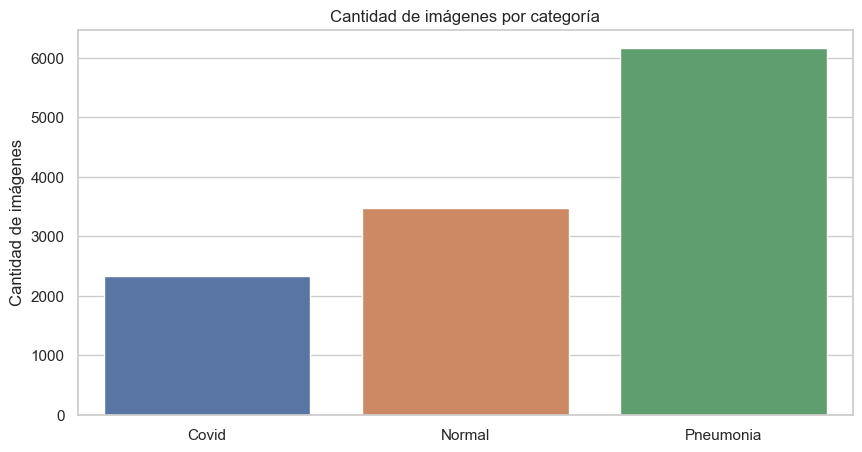

Proporciones de imágenes por categoría: 
Covid: 19.50%
Normal: 29.03%
Pneumonia: 51.48%


In [14]:
image_counts = {category: len(os.listdir(os.path.join(data_dir, category))) for category in categories}
print("Cantidad de imágnes por categoría: ")
for category, count in image_counts.items():
    print(f"{category}: {count} imágenes")

# Lo vemos gráficamente en un gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x=list(image_counts.keys()), y=list(image_counts.values()))
plt.title("Cantidad de imágenes por categoría")
plt.ylabel("Cantidad de imágenes")
plt.show()

# Proporciones de cada categoría
total_images = sum(image_counts.values())
proportions = {category: count / total_images for category, count in image_counts.items()}
print("Proporciones de imágenes por categoría: ")
for category, proportion in proportions.items():
    print(f"{category}: {proportion:.2%}")

#### 2.b.1- Ejemplos de imágenes

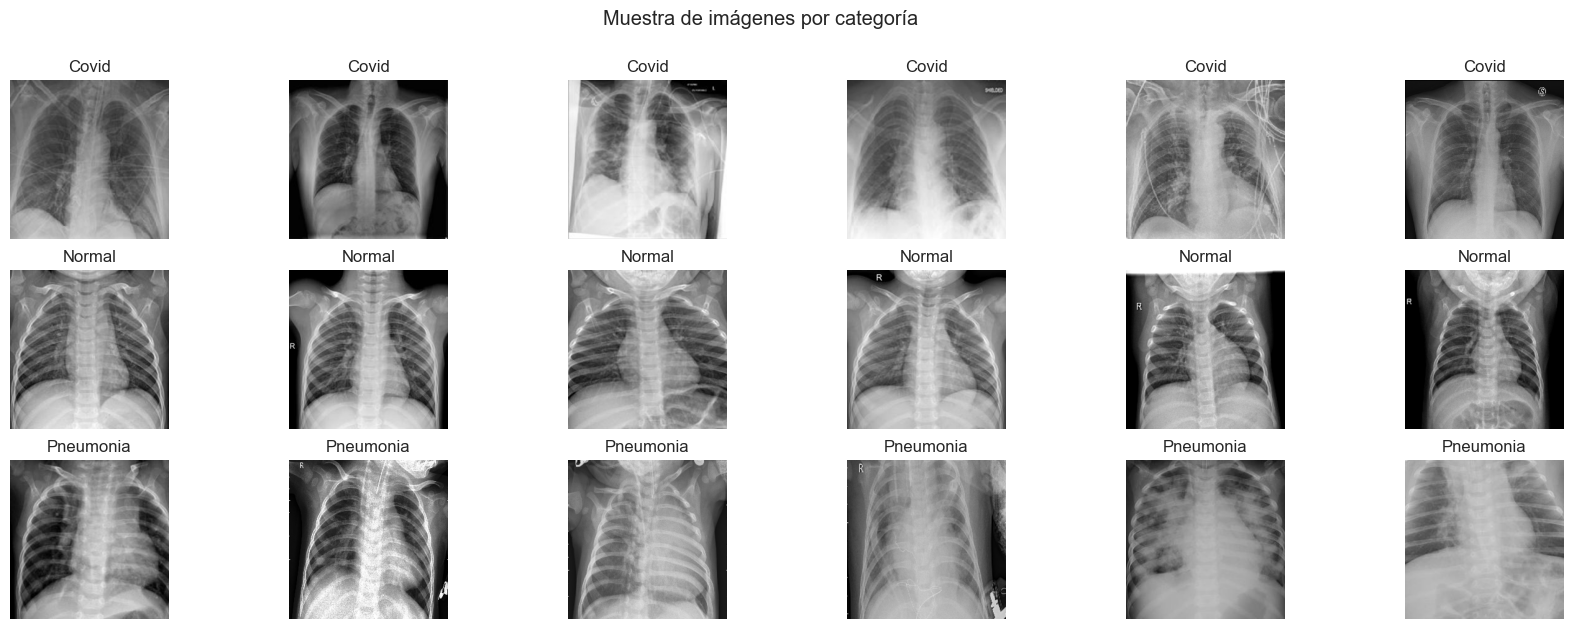

In [27]:
sample_size = 6
fig, axes = plt.subplots(len(categories), sample_size, figsize=(21, 7))
for i, category in enumerate(categories):
    category_dir = os.path.join(data_dir, category)
    sample_images = np.random.choice(os.listdir(category_dir), sample_size, replace=False)
    for j, image_name in enumerate(sample_images):
        image_path = os.path.join(category_dir, image_name)
        image = Image.open(image_path)
        axes[i, j].imshow(image, cmap='gray')
        axes[i, j].axis('off')
        axes[i, j].set_title(category)
plt.suptitle('Muestra de imágenes por categoría')
plt.show()
plt.show()

Obsevacion: Luego de haber corrido de manera repetitiva el código de arriba, una cosa a notar es que en muchas de las imagenes de neumonía por covid, se observan cables conectados a los pacientes, cosa que no ocurre en las otras dos categorías. Estimo que esto ocurre debido a que muchas imágenes de la categoría `Covid` han sido tomadas en situaciones donde el paciente se encuentra internado, y conectado a diferentes aparatos al mismo tiempo de la toma de la imagen.

## 3. Modelado y entrenamiento

### 3.a- Entrenamiento con modelos clásicos supervisados.
Vamos a trabajar, para la clasificación de imágenes, con la técnica Histograma de Gradientes Orientados (HOG). Esto lo debemos hacer debido a que como queremos clasificar imágenes, se deben extraer características de las mismas. 

Introducimos algo de contexto.

#### 3.a.1- Concepto HOG:

Los HOG describen la distribución de las intensidades de gradientes o las direcciones de os bordes dentro de una imagen. En logar de utilizar los valores de los píxeles, este método se centra en las variaciones y cambios de intensidad entre los píxeles, lo cual es muy informativo sobre la forma y el contorno de los objetos en la imagen. Se aplican a imágenes en escala de grises. Para cada píxel en la imagen.

##### 1. Cálculo del gradiente: 
Se calcula el gradiente en las direcciones $x$ e $y$, usando por ejemplo operadores de Sobel (u otro fitro de derivada). Esto produce dos matrices de gradiente $G_x$ y $G_y$:

$$
G_x = I * \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix},
$$

$$
G_y = I * \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix},
$$

donde

- $I$: Matrix de la imagen en escala de grises
- $G_x$ y $G_y$: Gradientes horizontales y verticales.

Se define la Magnitud $M$, 

$$
M_{ij} = \sqrt{G_{x, ij}^2 + G_{y, ij}^2},
$$
y la orientación $\theta$, 
$$
\theta_{ij} = \text{arctan}\left( \frac{G_{y, ij}}{G_{x, ij}} \right). 
$$

##### 2. División de la Imagen en Celdas:
La imagen se divide en pequeñas regiones llamadas celdas.

##### 3. Cálculo del Histograma de Gradientes:
Para cada celda, se construye un histograma de gradientes. El histograma cuenta el número de veces que el gradiente de un píxel tiene una orientación particular. La orientación del gradiente se agrupa en "bins" (por ejemplo, 9 bins que representan ángulos de 0 a 180 grados).

##### 4. Normalización de Bloques:
Para mejorar la invariancia a la iluminación y el contraste, se agrupan varias celdas en bloques superpuestos (por ejemplo, de 2x2 celdas). Los histogramas dentro de cada bloque se concatenan y luego se normalizan.

##### 5. Concatenación de Características:
Los histogramas normalizados de todos los bloques se concatenan para formar un vector de características final que representa la imagen.


##### Ventajas de HOG
-Captura de Información Local: Los HOG son muy buenos para capturar la estructura local y la forma de los objetos en la imagen.

-Invariancia a la Iluminación y el Contraste: La normalización de los bloques ayuda a que los HOG sean robustos frente a cambios en la iluminación y el contraste.

-Detección de Bordes y Texturas: Los HOG son efectivos para detectar bordes y texturas, lo que los hace útiles para la detección de objetos.



In [14]:
import cv2
import os
import numpy as np
from skimage.feature import hog
import matplotlib.pyplot as plt
from skimage import exposure

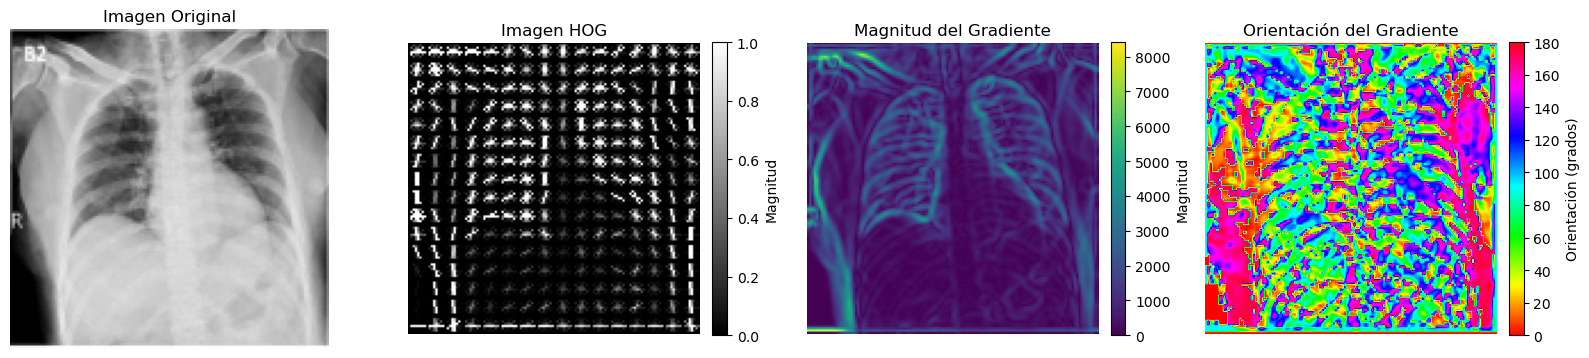

In [35]:
SIZE = 256

#Cargar una imagen aleatoria de la categoría Covid
data_dir = os.getcwd()
covid_dir = os.path.join(data_dir, 'data\\processed_data\\Covid')
covid_images = os.listdir(covid_dir)
image_path = os.path.join(covid_dir, np.random.choice(covid_images))

# Cargar una imagen en escala de grises
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Función para calcular la orientación del gradiente en grados
def gradient_orientation(grad_x, grad_y):
    return np.rad2deg(np.arctan2(grad_y, grad_x)) % 180

# Verificar si la imagen se cargó correctamente
if image is None:
    print("No se pudo cargar la imagen. Verifica la ruta y asegúrate de que la imagen existe.")
else:
    # Redimensionar la imagen
    image_resized = cv2.resize(image, (128, 128))

    # Calcular gradientes en dirección X e Y
    grad_x = cv2.Sobel(image_resized, cv2.CV_64F, 1, 0, ksize=5)
    grad_y = cv2.Sobel(image_resized, cv2.CV_64F, 0, 1, ksize=5)

    # Calcular magnitud y orientación del gradiente
    magnitud = np.sqrt(grad_x**2 + grad_y**2)
    orientacion = gradient_orientation(grad_x, grad_y)

    # Calcular HOG
    features, hog_image = hog(image_resized, orientations=9, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2), visualize=True, block_norm='L2-Hys')

    # Normalizar la imagen de HOG para mejorar la visualización de la magnitud
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    # Mostrar la imagen original, la imagen HOG, la magnitud y la orientación
    fig, axes = plt.subplots(1, 4, figsize=(16, 4))

    axes[0].imshow(image_resized, cmap='gray')
    axes[0].set_title('Imagen Original')
    axes[0].axis('off')

    im1 = axes[1].imshow(hog_image_rescaled, cmap='gray')
    axes[1].set_title('Imagen HOG')
    axes[1].axis('off')
    cbar1 = fig.colorbar(im1, ax=axes[1], orientation='vertical', fraction=0.046, pad=0.04)
    cbar1.set_label('Magnitud')

    im2 = axes[2].imshow(magnitud, cmap='viridis')
    axes[2].set_title('Magnitud del Gradiente')
    axes[2].axis('off')
    cbar2 = fig.colorbar(im2, ax=axes[2], orientation='vertical', fraction=0.046, pad=0.04)
    cbar2.set_label('Magnitud')

    im3 = axes[3].imshow(orientacion, cmap='hsv', vmin=0, vmax=180)
    axes[3].set_title('Orientación del Gradiente')
    axes[3].axis('off')
    cbar3 = fig.colorbar(im3, ax=axes[3], orientation='vertical', fraction=0.046, pad=0.04)
    cbar3.set_label('Orientación (grados)')

    plt.tight_layout()
    plt.show()

Vamos a entrenar un modelo con Support Vector Machine (SVM)

In [41]:
import os
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [38]:
# Directorio del jupiter notebook
jn_direct = os.getcwd()

# Directorio donde están las carpetas dataset1, dataset2, dataset3
data_dir = 'data'

# Lista de datasets (carpetas dataset1, dataset2, dataset3)
datasets = ['dataset1', 'dataset2', 'dataset3']

# Lista de categorías
categories = ['Covid', 'Normal', 'Pneumonia']

In [46]:
# Función para leer imágenes y etiquetas
def load_images_and_labels(jn_direct, data_dir, datasets, categories):
    images = []
    labels = []
    for dataset in datasets:
        for category in categories:
            label = categories.index(category)
            for subdir in ['train', 'test']:
                category_dir = os.path.join(jn_direct, data_dir, dataset, subdir, category)
                if os.path.exists(category_dir):
                    for filename in tqdm(os.listdir(category_dir)):
                        if filename.endswith('.jpeg') or filename.endswith('.jpg') or filename.endswith('.png'):
                            img_path = os.path.join(category_dir, filename)
                            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                            img = cv2.resize(img, (64, 64))  # Redimensionar las imágenes
                            images.append(img)
                            labels.append(label)
    return images, labels

# Función para extraer características HOG
def extract_hog_features(images):
    hog_features = []
    for image in tqdm(images):
        features, _ = hog(image, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(4, 4), visualize=True)
        hog_features.append(features)
    return np.array(hog_features)

In [47]:
# Cargar imágenes y etiquetas
images, labels = load_images_and_labels(jn_direct, data_dir, datasets, categories)

100%|██████████| 855/855 [00:06<00:00, 124.14it/s]


In [48]:
# Extraer características HOG
hog_features = extract_hog_features(images)

100%|██████████| 11977/11977 [02:53<00:00, 69.19it/s]


In [49]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(hog_features, labels, test_size=0.2, random_state=42)

# Entrenar un clasificador SVM
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [50]:
# Realizar predicciones
y_pred = svm_classifier.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Reporte del resto de las métricas:\n", classification_report(y_test, y_pred, target_names=categories))

Accuracy: 0.9611853088480802
Classification Report:
               precision    recall  f1-score   support

       Covid       0.98      0.99      0.98       471
      Normal       0.94      0.94      0.94       694
   Pneumonia       0.97      0.97      0.97      1231

    accuracy                           0.96      2396
   macro avg       0.96      0.96      0.96      2396
weighted avg       0.96      0.96      0.96      2396



Esto me parece altísimo. Como dijo Luis, too good to be true. Lo que si es cierto, es que se tarda mucho tiempo para cargar las imágenes. Podemos tratar de hacer un kfold-validation.